In [ ]:
import pandas as pd

# 데이터 불러오기

In [ ]:
subway_201510_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201510.csv", encoding = 'cp949')
subway_201610_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201610.csv", encoding = 'cp949')
subway_201710_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201710.csv", encoding = 'cp949')
subway_201810_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201810.csv", encoding = 'cp949')
subway_201910_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201910.csv", encoding = 'cp949')

In [ ]:
subway_202010_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_202010.csv", encoding = 'UTF-8')
subway_202110_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_202110.csv", encoding = 'UTF-8')
subway_202210_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_202210.csv", encoding = 'UTF-8')

# 데이터프레임 전처리

2015부터 2019년까지 자료와 다르게 생긴 2020년부터 2022년까지 데이터프레임의 전처리

In [ ]:
subway_202010_df = subway_202010_df.loc[:,'노선명':'등록일자']
subway_202110_df = subway_202110_df.loc[:,'노선명':'등록일자']
subway_202210_df = subway_202210_df.loc[:,'노선명':'등록일자']

In [ ]:
pd.DataFrame(subway_202010_df).head(2)

,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20201001,2호선,시청,2118,1605
1,20201001,1호선,청량리(서울시립대입구),6567,6637


In [ ]:
subway_202010_df.columns = ['사용일자','노선명','역명','승차총승객수','하차총승객수']
subway_202110_df.columns = ['사용일자','노선명','역명','승차총승객수','하차총승객수']
subway_202210_df.columns = ['사용일자','노선명','역명','승차총승객수','하차총승객수']

In [ ]:
pd.DataFrame(subway_202010_df).head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20201001,2호선,시청,2118,1605
1,20201001,1호선,청량리(서울시립대입구),6567,6637


2015년부터 2022년까지의 10월 데이터프레임 하나의 데이터프레임으로 합치기

In [ ]:
dataframes = [subway_201510_df,subway_201610_df,subway_201710_df,subway_201810_df,subway_201910_df,subway_202010_df,subway_202110_df,subway_202210_df]

In [ ]:
df_10 = pd.concat(dataframes, axis = 0)
df_10.reset_index(inplace = True , drop = True)

df_10 = pd.DataFrame(df_10)

df_10.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20151001,경인선,중동,11414.0,10683.0,20151217.0
1,20151001,경인선,온수,8548.0,8035.0,20151217.0
2,20151001,경인선,도원,4430.0,4544.0,20151217.0
3,20151001,경인선,간석,7341.0,7088.0,20151217.0
4,20151001,경인선,부개,11951.0,11093.0,20151217.0


In [ ]:
df_10.columns = ['UsedDate','Line','Station','Board','Alight','Registration']
df_10['Sum'] = df_10['Board']+df_10['Alight']
df_10['Date'] = df_10['UsedDate'] % 10000
df_10['UsedDate'] = df_10['UsedDate'].astype('str')

pd.DataFrame(df_10)

,UsedDate,Line,Station,Board,Alight,Registration,Sum,Date
0,20151001,경인선,중동,11414.0,10683.0,20151217.0,22097.0,1001
1,20151001,경인선,온수,8548.0,8035.0,20151217.0,16583.0,1001
2,20151001,경인선,도원,4430.0,4544.0,20151217.0,8974.0,1001
3,20151001,경인선,간석,7341.0,7088.0,20151217.0,14429.0,1001
4,20151001,경인선,부개,11951.0,11093.0,20151217.0,23044.0,1001
...,...,...,...,...,...,...,...,...
144783,20221031,6호선,버티고개,2366.0,2239.0,NaN,4605.0,1031
144784,20221031,6호선,약수,3778.0,3751.0,NaN,7529.0,1031
144785,20221031,6호선,청구,3842.0,4067.0,NaN,7909.0,1031
144786,20221031,6호선,신당,8136.0,8814.0,NaN,16950.0,1031


# 할로윈 포함 토요일과 할로윈 미포함 토요일 비교

## 요일 칼럼 추가

In [ ]:
df_10_itw = df_10[df_10['Station']=='이태원']
df_10_gn = df_10[df_10['Station']=='강남']
df_10_gb = pd.concat([df_10[df_10['Station']=='강변'], df_10[df_10['Station']=='강변(동서울터미널)']],axis = 0)
df_10_gd = df_10[df_10['Station']=='구로디지털단지']
df_10_sl = df_10[df_10['Station']=='신림']
df_10_js = pd.concat([df_10[df_10['Station']=='잠실'], df_10[df_10['Station']=='잠실(송파구청)']],axis = 0) #환승역이라 2호선 8호선 합쳐져 데이터 양 2배배


In [ ]:
import datetime
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [ ]:
date = []
for i in range(0,len(pd.DataFrame(df_10_itw['UsedDate']))):
  a = pd.DataFrame(df_10_itw['UsedDate']).iat[i,0]
  date.append(days[datetime.date(int(a[0:4]),int(a[4:6]),int(a[6:8])).weekday()])

# 요일 컬럼 집어넣기
df_10_itw.insert(0,'Weekday',date)


In [ ]:
date = []
for i in range(0,len(pd.DataFrame(df_10_gn['UsedDate']))):
  a = pd.DataFrame(df_10_gn['UsedDate']).iat[i,0]
  date.append(days[datetime.date(int(a[0:4]),int(a[4:6]),int(a[6:8])).weekday()])

# 요일 컬럼 집어넣기
df_10_gn.insert(0,'Weekday',date)

In [ ]:
date = []
for i in range(0,len(pd.DataFrame(df_10_gb['UsedDate']))):
  a = pd.DataFrame(df_10_gb['UsedDate']).iat[i,0]
  date.append(days[datetime.date(int(a[0:4]),int(a[4:6]),int(a[6:8])).weekday()])

# 요일 컬럼 집어넣기
df_10_gb.insert(0,'Weekday',date)

In [ ]:
date = []
for i in range(0,len(pd.DataFrame(df_10_gd['UsedDate']))):
  a = pd.DataFrame(df_10_gd['UsedDate']).iat[i,0]
  date.append(days[datetime.date(int(a[0:4]),int(a[4:6]),int(a[6:8])).weekday()])

# 요일 컬럼 집어넣기
df_10_gd.insert(0,'Weekday',date)

In [ ]:
date = []
for i in range(0,len(pd.DataFrame(df_10_sl['UsedDate']))):
  a = pd.DataFrame(df_10_sl['UsedDate']).iat[i,0]
  date.append(days[datetime.date(int(a[0:4]),int(a[4:6]),int(a[6:8])).weekday()])

# 요일 컬럼 집어넣기
df_10_sl.insert(0,'Weekday',date)

In [ ]:
date = []
for i in range(0,len(pd.DataFrame(df_10_js['UsedDate']))):
  a = pd.DataFrame(df_10_js['UsedDate']).iat[i,0]
  date.append(days[datetime.date(int(a[0:4]),int(a[4:6]),int(a[6:8])).weekday()])

# 요일 컬럼 집어넣기
df_10_js.insert(0,'Weekday',date)

## 각 역별 토요일만 추출

In [ ]:
df_10_itw_Sats = df_10_itw[df_10_itw['Weekday']=='Sat']
df_10_gn_Sats = df_10_gn[df_10_gn['Weekday']=='Sat']
df_10_gb_Sats = df_10_gb[df_10_gb['Weekday']=='Sat']
df_10_gd_Sats = df_10_gd[df_10_gd['Weekday']=='Sat']
df_10_sl_Sats = df_10_sl[df_10_sl['Weekday']=='Sat'].groupby('UsedDate').sum().reset_index()
df_10_js_Sats = df_10_js[df_10_js['Weekday']=='Sat'].groupby('UsedDate').sum().reset_index()

In [ ]:
df_10_itw_Sats.sort_values('Sum',ascending = False).head(10)

,Weekday,UsedDate,Line,Station,Board,Alight,Registration,Sum,Date
143169,Sat,20221029,6호선,이태원,48459.0,81362.0,NaN,129821.0,1029
16570,Sat,20151031,6호선,이태원,37666.0,71712.0,20151217.0,109378.0,1031
50585,Sat,20171028,6호선,이태원,39662.0,64310.0,20171031.0,103972.0,1028
68104,Sat,20181027,6호선,이태원,40276.0,61902.0,20181030.0,102178.0,1027
59997,Sat,20181013,6호선,이태원,43183.0,54732.0,20181016.0,97915.0,1013
42274,Sat,20171014,6호선,이태원,42625.0,54618.0,20171017.0,97243.0,1014
85721,Sat,20191026,6호선,이태원,38619.0,57844.0,20191029.0,96463.0,1026
9015,Sat,20151017,6호선,이태원,40597.0,48892.0,20151217.0,89489.0,1017
25088,Sat,20161015,6호선,이태원,39703.0,48687.0,20161023.0,88390.0,1015
77455,Sat,20191012,6호선,이태원,38648.0,48537.0,20191015.0,87185.0,1012


In [ ]:
itw = pd.DataFrame(df_10_itw_Sats['Sum']).reset_index(drop = True)
gn = pd.DataFrame(df_10_gn_Sats['Sum']).reset_index(drop = True)
gb = pd.DataFrame(df_10_gb_Sats['Sum']).reset_index(drop = True)
gdc = pd.DataFrame(df_10_gd_Sats['Sum']).reset_index(drop = True)
sl = pd.DataFrame(df_10_sl_Sats['Sum']).reset_index(drop = True)
js = pd.DataFrame(df_10_js_Sats['Sum']).reset_index(drop = True)

In [ ]:
itw.columns = ['Itaewon']
gn.columns = ['Gangnam']
gb.columns = ['Gangbyeon']
gdc.columns = ['GuroDigitalComplex']
sl.columns = ['Shillim']
js.columns = ['Jamsil']

In [ ]:
df = pd.concat([itw,gn,gb,gdc,sl,js],axis = 1)
df.index = df_10_itw_Sats['UsedDate']

In [ ]:
df = df.reset_index()

In [ ]:
df

,UsedDate,Itaewon,Gangnam,Gangbyeon,GuroDigitalComplex,Shillim,Jamsil
0,20151003,49541.0,156906.0,114100.0,93113.0,133878.0,197173.0
1,20151010,43056.0,158294.0,106874.0,86263.0,126740.0,188443.0
2,20151017,89489.0,177472.0,120434.0,98075.0,143075.0,194933.0
3,20151024,49343.0,181561.0,120925.0,98980.0,141280.0,194828.0
4,20151031,109378.0,184265.0,122482.0,98275.0,143980.0,215168.0
5,20161001,51811.0,173694.0,119900.0,92861.0,132882.0,219965.0
6,20161008,54789.0,187299.0,120803.0,102615.0,144054.0,213261.0
7,20161015,88390.0,177947.0,117230.0,97903.0,139967.0,207369.0
8,20161022,52606.0,180707.0,120698.0,96246.0,138421.0,214669.0
9,20161029,83765.0,188620.0,121122.0,99104.0,141455.0,228363.0


## 단측검정

In [ ]:
from scipy import stats

이태원역 단측 검정

In [ ]:
con1 = df['UsedDate']=='20151031'
con2 = df['UsedDate']=='20161029'
con3 = df['UsedDate']=='20171028'
con4 = df['UsedDate']=='20181027'
con5 = df['UsedDate']=='20191026'
con6 = df['UsedDate']=='20201031'
con7 = df['UsedDate']=='20211030'
con8 = df['UsedDate']=='20221029'

df_itw_Sats_H = df.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Itaewon']
df_itw_Sats_nH = df.loc[~con1 & ~con2 & ~con3 & ~con4 & ~con5 & ~con6 & ~con7 & ~con8,'Itaewon']

In [ ]:
t_stat, p_value = stats.ttest_ind(df_itw_Sats_H, df_itw_Sats_nH, equal_var=True, alternative="greater")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 3.8584456829722025, p-value : 0.00023461339063932446


In [ ]:
print(df_itw_Sats_H.mean())
print(df_itw_Sats_nH.mean())

89364.875
50145.24137931035


강남역 단측검정

In [ ]:
con1 = df['UsedDate']=='20151031'
con2 = df['UsedDate']=='20161029'
con3 = df['UsedDate']=='20171028'
con4 = df['UsedDate']=='20181027'
con5 = df['UsedDate']=='20191026'
con6 = df['UsedDate']=='20201031'
con7 = df['UsedDate']=='20211030'
con8 = df['UsedDate']=='20221029'

df_gn_Sats_H = df.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Gangnam']
df_gn_Sats_nH = df.loc[~con1 & ~con2 & ~con3 & ~con4 & ~con5 & ~con6 & ~con7 & ~con8,'Gangnam']

In [ ]:
t_stat, p_value = stats.ttest_ind(df_gn_Sats_H, df_gn_Sats_nH, equal_var=True, alternative="greater")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 1.1716994972431813, p-value : 0.12461619470903676


In [ ]:
print(df_gn_Sats_H.mean())
print(df_gn_Sats_nH.mean())

165940.75
148626.62068965516


강변역 단측검정

In [ ]:
con1 = df['UsedDate']=='20151031'
con2 = df['UsedDate']=='20161029'
con3 = df['UsedDate']=='20171028'
con4 = df['UsedDate']=='20181027'
con5 = df['UsedDate']=='20191026'
con6 = df['UsedDate']=='20201031'
con7 = df['UsedDate']=='20211030'
con8 = df['UsedDate']=='20221029'

df_gb_Sats_H = df.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Gangbyeon']
df_gb_Sats_nH = df.loc[~con1 & ~con2 & ~con3 & ~con4 & ~con5 & ~con6 & ~con7 & ~con8,'Gangbyeon']

In [ ]:
t_stat, p_value = stats.ttest_ind(df_gb_Sats_H, df_gb_Sats_nH, equal_var=True, alternative="greater")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 0.8223021340306483, p-value : 0.20823603374702143


In [ ]:
print(df_gb_Sats_H.mean())
print(df_gb_Sats_nH.mean())

98243.625
88601.8275862069


구로디지털단지역 단측검정

In [ ]:
con1 = df['UsedDate']=='20151031'
con2 = df['UsedDate']=='20161029'
con3 = df['UsedDate']=='20171028'
con4 = df['UsedDate']=='20181027'
con5 = df['UsedDate']=='20191026'
con6 = df['UsedDate']=='20201031'
con7 = df['UsedDate']=='20211030'
con8 = df['UsedDate']=='20221029'

df_gdc_Sats_H = df.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'GuroDigitalComplex']
df_gdc_Sats_nH = df.loc[~con1 & ~con2 & ~con3 & ~con4 & ~con5 & ~con6 & ~con7 & ~con8,'GuroDigitalComplex']

In [ ]:
t_stat, p_value = stats.ttest_ind(df_gdc_Sats_H, df_gdc_Sats_nH, equal_var=True, alternative="greater")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 1.0051403906134682, p-value : 0.1608640577392257


In [ ]:
print(df_gdc_Sats_H.mean())
print(df_gdc_Sats_nH.mean())

89057.5
82659.75862068965


신림역 단측검정

In [ ]:
con1 = df['UsedDate']=='20151031'
con2 = df['UsedDate']=='20161029'
con3 = df['UsedDate']=='20171028'
con4 = df['UsedDate']=='20181027'
con5 = df['UsedDate']=='20191026'
con6 = df['UsedDate']=='20201031'
con7 = df['UsedDate']=='20211030'
con8 = df['UsedDate']=='20221029'

df_sl_Sats_H = df.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Shillim']
df_sl_Sats_nH = df.loc[~con1 & ~con2 & ~con3 & ~con4 & ~con5 & ~con6 & ~con7 & ~con8,'Shillim']

In [ ]:
t_stat, p_value = stats.ttest_ind(df_sl_Sats_H, df_sl_Sats_nH, equal_var=True, alternative="greater")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 1.0384787966849238, p-value : 0.1530843047359403


In [ ]:
print(df_sl_Sats_H.mean())
print(df_sl_Sats_nH.mean())

124907.25
115809.13793103448


잠실역 단측검정

In [ ]:
con1 = df['UsedDate']=='20151031'
con2 = df['UsedDate']=='20161029'
con3 = df['UsedDate']=='20171028'
con4 = df['UsedDate']=='20181027'
con5 = df['UsedDate']=='20191026'
con6 = df['UsedDate']=='20201031'
con7 = df['UsedDate']=='20211030'
con8 = df['UsedDate']=='20221029'

df_js_Sats_H = df.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Jamsil']
df_js_Sats_nH = df.loc[~con1 & ~con2 & ~con3 & ~con4 & ~con5 & ~con6 & ~con7 & ~con8,'Jamsil']

In [ ]:
t_stat, p_value = stats.ttest_ind(df_js_Sats_H, df_js_Sats_nH, equal_var=True, alternative="greater")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 1.833565074685565, p-value : 0.037617047595664053


In [ ]:
print(df_js_Sats_H.mean())
print(df_js_Sats_nH.mean())

214899.125
187156.10344827586


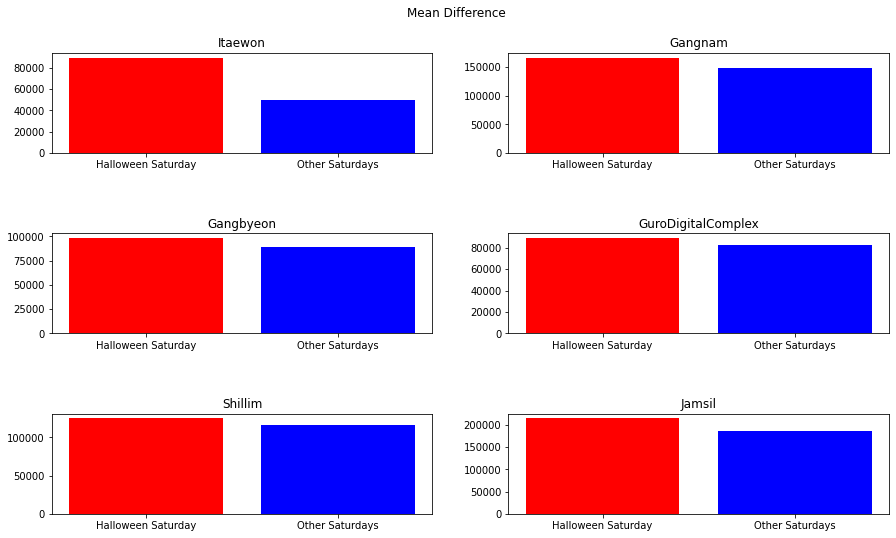

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (15, 8)) # 2x2
axes[0,0].bar(['Halloween Saturday', 'Other Saturdays'],[df_itw_Sats_H.mean(),df_itw_Sats_nH.mean()], color = ['r','b'])
axes[0,1].bar(['Halloween Saturday', 'Other Saturdays'],[df_gn_Sats_H.mean(),df_gn_Sats_nH.mean()], color = ['r','b'])
axes[1,0].bar(['Halloween Saturday', 'Other Saturdays'],[df_gb_Sats_H.mean(),df_gb_Sats_nH.mean()], color = ['r','b'])
axes[1,1].bar(['Halloween Saturday', 'Other Saturdays'],[df_gdc_Sats_H.mean(),df_gdc_Sats_nH.mean()], color = ['r','b'])
axes[2,0].bar(['Halloween Saturday', 'Other Saturdays'],[df_sl_Sats_H.mean(),df_sl_Sats_nH.mean()], color = ['r','b'])
axes[2,1].bar(['Halloween Saturday', 'Other Saturdays'],[df_js_Sats_H.mean(),df_js_Sats_nH.mean()], color = ['r','b'])

fig.suptitle('Mean Difference')
axes[0,0].set_title('Itaewon')
axes[0,1].set_title('Gangnam')
axes[1,0].set_title('Gangbyeon')
axes[1,1].set_title('GuroDigitalComplex')
axes[2,0].set_title('Shillim')
axes[2,1].set_title('Jamsil')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.8)

plt.show()

## 시각화

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

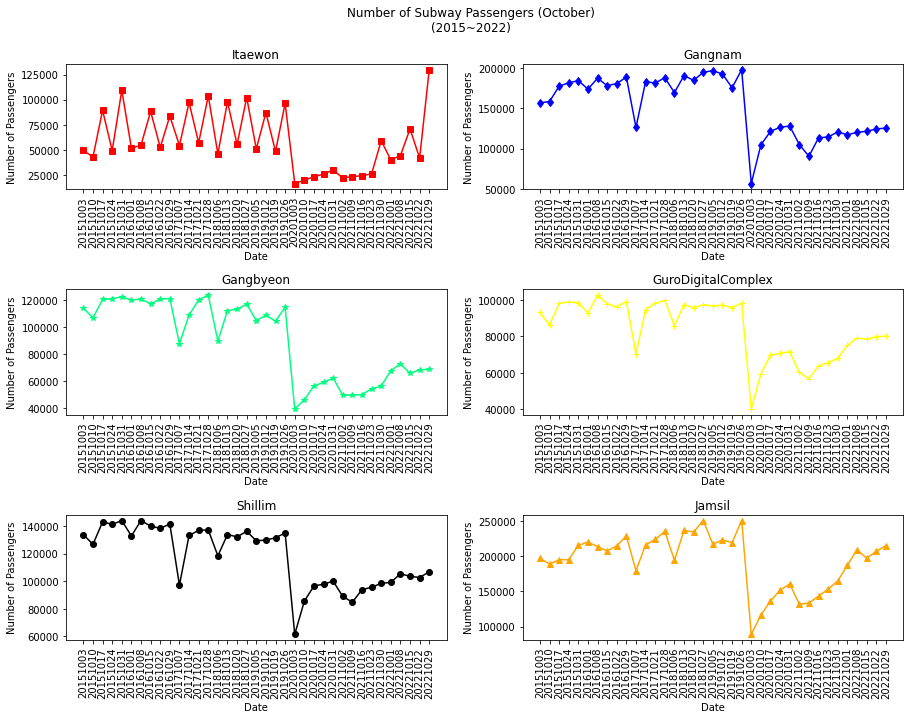

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (15, 10)) 

df_col = ['Itaewon', 'Gangnam', 'Gangbyeon', 'GuroDigitalComplex','Shillim','Jamsil']
markers = ['s', 'd', '*', '+', 'o', '^']
colors = ['red', 'blue', 'springgreen', 'yellow', 'black', 'orange']

for i, ax in enumerate(axes.reshape(-1)):
  ax.plot(df['UsedDate'], df[df_col[i]], marker = markers[i], color = colors[i])
  ax.set_title(df_col[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Number of Passengers')
  ax.set_xticklabels(df['UsedDate'], rotation = 90)

fig.suptitle('''Number of Subway Passengers (October)
(2015~2022)''')
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.8)
fig.savefig('/content/drive/MyDrive/plot최종.jpeg')
plt.show()

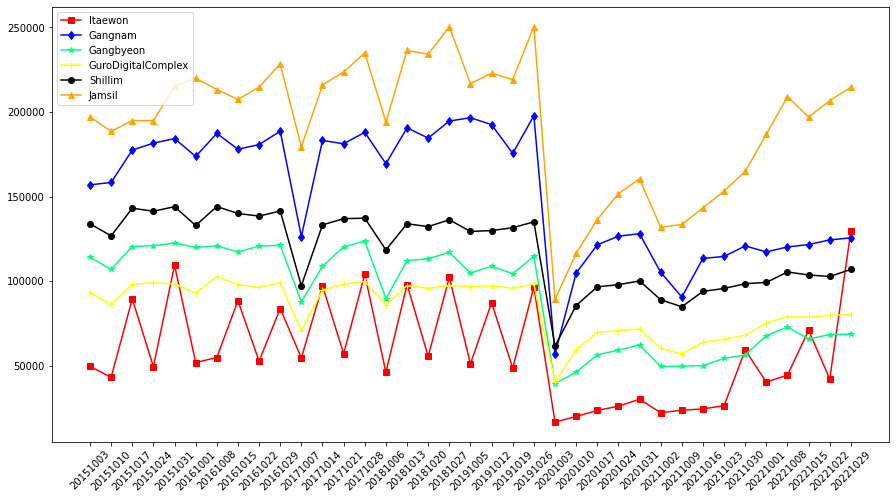

In [ ]:
plt.figure(figsize = (15, 8))
plt.plot(df['UsedDate'], df.Itaewon, marker = 's', color = 'red')
plt.plot(df['UsedDate'], df.Gangnam, marker = 'd', color = 'blue')
plt.plot(df['UsedDate'], df.Gangbyeon, marker = '*', color = 'springgreen')
plt.plot(df['UsedDate'], df.GuroDigitalComplex, marker = '+', color = 'yellow')
plt.plot(df['UsedDate'], df.Shillim, marker = 'o', color = 'black')
plt.plot(df['UsedDate'], df.Jamsil, marker = '^', color = 'orange')
plt.xticks(df['UsedDate'], df['UsedDate'], rotation = 45, fontsize = 10) 

plt.legend(df_col)

fig.savefig('/content/drive/MyDrive/plot최종2.jpeg')

plt.show()

## 크롤링

In [ ]:
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}

In [ ]:
import requests
from bs4 import BeautifulSoup

#크롤링할 url 설정

titles = []

dates = ['20151017', '20161015', '20171014', '20181013', '20191012', '20221022']

for i in dates:
  url = 'https://www.google.com/search?q=%s%%EB%%85%%84+%s%%EC%%9B%%94+%s%%EC%%9D%%BC+%%EC%%9D%%B4%%ED%%83%%9C%%EC%%9B%%90' %(i[0:4],i[4:6],i[6:8])

#url과 header 지정하여 정보 요청
  res = requests.get(url, headers = headers)

#응답요청이 200이면 계속 실행, 아니면 중지
  res.raise_for_status()

  soup = BeautifulSoup(res.text, 'html.parser') 

  items = soup.select('h3')
  for item in items[:30]:
    print(item.get_text())
    titles.append(item)

「2015년 10월 17일 이태원」的圖片搜尋結果
2015년 이태원 지구촌 축제 10월17일 - 네이버 블로그
[오늘의 날씨]2015년 10월 17일 - 경향신문
오늘의 인사 - 2015년 10월 17일 - 경향신문
[주말판] 이태원 지구촌축제 현장 - 플래텀
꼼짝 마! 레이싱 모델 차혜리, 강력한 섹시로 제압 - 탑라이더
이태원에 몇안되는 오래된 Pub - 게코스 가든, 서울, 대한민국의 리뷰 ...
이태원의 핫플레이스 - 라이너스 바베큐, 서울, 대한민국의 리뷰
[운세][오늘의 운세] 2015년 10월 17일 황소자리 | YTN
이태원 참사, 60여년전 부산 67명-서울역 31명 압사 훌쩍 넘어
「2016년 10월 15일 이태원」的圖片搜尋結果
앞으로 한달도 채남지 않은 2016 이태원지구촌축제 : 2016년10월15 ...
이태원 지구촌축제 2016 (2016.10.15)
2016 이태원지구촌축제 서포터즈 모집 - WEVITY(위비티) 공모전
2016이태원지구촌축제가 돌아왔어요 - 네이버 블로그
2016년 이태원 지구촌 축제 개막! - 용산구 - 네이버 블로그
할로윈 - 나무위키:대문
이태원 살인 사건 - 나무위키:대문
원코스 서울011 이태원 이슬람거리 대한민국을 여행하는 히치하이커를 위한 안내서: 1 Course ...
페미니스트 타임워프: 페미니즘이 한국 사회를 기억하는 방법
「2017년 10월 14일 이태원」的圖片搜尋結果
2017년 10월14일 토 이태원 지구촌 축제 &이태원 최초 클럽데이
2017 이태원지구촌축제 오는 10월14일(토)
이태원 압사 사고 - 나무위키
2017 이태원 지구촌축제 : 주식회사 붐컴
이태원 지구촌축제 2017 총정리 (일정, 시간, 주차) - 두개의삶
이태원 지구촌축제 10월 가볼만한곳에서 세계인의 축제를 즐겨 ...
이태원 천사
원코스 서울011 이태원 이슬람거리 대한민국을 여행하는 히치하이커를 위한 안내서: 1 Course ...
면접시험부터 실무까지 영어 관광통역안내사
2018년 10월 13일 이태원거리 지구촌축제 -

In [ ]:
f = open('/content/drive/MyDrive/DSL/titles.txt', 'w', encoding='utf-8')
 
for data in titles:
    
    f.write(str(data))
    f.write('\n')
 
f.close()

Text Cleaning

In [ ]:
 !pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 42.1 MB/s eta 0:00:00


In [ ]:
import re
import konlpy

In [ ]:
with open(r'/content/drive/MyDrive/DSL/titles.txt', encoding='utf-8') as f:
    text = f.readlines()

In [ ]:
text_strip = list([i.strip() for i in text if i != '\n'])
text_join = ' '.join(text_strip)

In [ ]:
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)

print(filtered_content)

 h3 aria level  2  class  GmE3X  role  heading   2015년 10월 17일 이태원 的圖片搜尋結果  h3   h3 class  LC20lb MBeuO DKV0Md  2015년 이태원 지구촌 축제 10월17일   네이버 블로그  h3   h3 class  LC20lb MBeuO DKV0Md   오늘의 날씨 2015년 10월 17일   경향신문  h3   h3 class  LC20lb MBeuO DKV0Md  오늘의 인사   2015년 10월 17일   경향신문  h3   h3 class  LC20lb MBeuO DKV0Md   주말판  이태원 지구촌축제 현장   플래텀  h3   h3 class  LC20lb MBeuO DKV0Md  꼼짝 마  레이싱 모델 차혜리  강력한 섹시로 제압   탑라이더  h3   h3 class  LC20lb MBeuO DKV0Md  이태원에 몇안되는 오래된 Pub   게코스 가든  서울  대한민국의 리뷰      h3   h3 class  LC20lb MBeuO DKV0Md  이태원의 핫플레이스   라이너스 바베큐  서울  대한민국의 리뷰  h3   h3 class  LC20lb MBeuO DKV0Md   운세  오늘의 운세  2015년 10월 17일 황소자리   YTN  h3   h3 class  LC20lb MBeuO DKV0Md  이태원 참사  60여년전 부산 67명 서울역 31명 압사 훌쩍 넘어  h3   h3 aria level  2  class  GmE3X  role  heading   2016년 10월 15일 이태원 的圖片搜尋結果  h3   h3 class  LC20lb MBeuO DKV0Md  앞으로 한달도 채남지 않은 2016 이태원지구촌축제   2016년10월15      h3   h3 class  LC20lb MBeuO DKV0Md  이태원 지구촌축제 2016  2016 10 15   h3   h3 class  LC20lb MBeuO DKV0Md  2016 이태원지구촌축제 서포

형태소 분석기

In [ ]:
komoran = konlpy.tag.Komoran()
komoran_pos = komoran.pos(filtered_content)
print(komoran_pos)

[('h', 'SL'), ('3', 'SN'), ('aria', 'SL'), ('level', 'SL'), ('2', 'SN'), ('class', 'SL'), ('GmE', 'SL'), ('3', 'SN'), ('X', 'SL'), ('role', 'SL'), ('heading', 'SL'), ('2015', 'SN'), ('년', 'NNB'), ('10월 17일', 'NNP'), ('이태원', 'NNP'), ('的圖片搜尋結果', 'SH'), ('h', 'SL'), ('3', 'SN'), ('h', 'SL'), ('3', 'SN'), ('class', 'SL'), ('LC', 'SL'), ('20', 'SN'), ('lb', 'SL'), ('MBeuO', 'SL'), ('DKV', 'SL'), ('0', 'SN'), ('Md', 'SL'), ('2015', 'SN'), ('년', 'NNB'), ('이태원', 'NNP'), ('지구촌', 'NNP'), ('축제', 'NNP'), ('10', 'SN'), ('월', 'NNB'), ('17', 'SN'), ('일', 'NNB'), ('네이버', 'NNP'), ('블로그', 'NNP'), ('h', 'SL'), ('3', 'SN'), ('h', 'SL'), ('3', 'SN'), ('class', 'SL'), ('LC', 'SL'), ('20', 'SN'), ('lb', 'SL'), ('MBeuO', 'SL'), ('DKV', 'SL'), ('0', 'SN'), ('Md', 'SL'), ('오늘', 'NNG'), ('의', 'JKG'), ('날씨', 'NNP'), ('2015', 'SN'), ('년', 'NNB'), ('10월 17일', 'NNP'), ('경향신문', 'NNP'), ('h', 'SL'), ('3', 'SN'), ('h', 'SL'), ('3', 'SN'), ('class', 'SL'), ('LC', 'SL'), ('20', 'SN'), ('lb', 'SL'), ('MBeuO', 'SL'), ('DKV

In [ ]:
komoran.morphs(filtered_content)

['h',
 '3',
 'aria',
 'level',
 '2',
 'class',
 'GmE',
 '3',
 'X',
 'role',
 'heading',
 '2015',
 '년',
 '10월 17일',
 '이태원',
 '的圖片搜尋結果',
 'h',
 '3',
 'h',
 '3',
 'class',
 'LC',
 '20',
 'lb',
 'MBeuO',
 'DKV',
 '0',
 'Md',
 '2015',
 '년',
 '이태원',
 '지구촌',
 '축제',
 '10',
 '월',
 '17',
 '일',
 '네이버',
 '블로그',
 'h',
 '3',
 'h',
 '3',
 'class',
 'LC',
 '20',
 'lb',
 'MBeuO',
 'DKV',
 '0',
 'Md',
 '오늘',
 '의',
 '날씨',
 '2015',
 '년',
 '10월 17일',
 '경향신문',
 'h',
 '3',
 'h',
 '3',
 'class',
 'LC',
 '20',
 'lb',
 'MBeuO',
 'DKV',
 '0',
 'Md',
 '오늘',
 '의',
 '인사',
 '2015',
 '년',
 '10월 17일',
 '경향신문',
 'h',
 '3',
 'h',
 '3',
 'class',
 'LC',
 '20',
 'lb',
 'MBeuO',
 'DKV',
 '0',
 'Md',
 '주말',
 '판',
 '이태원',
 '지구촌',
 '축제',
 '현장',
 '플래텀',
 'h',
 '3',
 'h',
 '3',
 'class',
 'LC',
 '20',
 'lb',
 'MBeuO',
 'DKV',
 '0',
 'Md',
 '꼼짝',
 '말',
 '아',
 '레이싱 모델',
 '차',
 '혜리',
 '강력',
 '하',
 'ㄴ',
 '섹시',
 '로',
 '제압',
 '탑',
 '라이',
 '더',
 'h',
 '3',
 'h',
 '3',
 'class',
 'LC',
 '20',
 'lb',
 'MBeuO',
 'DKV',
 '0',
 'Md',
 '이태원

In [ ]:
print(komoran.nouns(filtered_content))
komoran_nouns = komoran.nouns(filtered_content)

['년', '10월 17일', '이태원', '년', '이태원', '지구촌', '축제', '월', '일', '네이버', '블로그', '오늘', '날씨', '년', '10월 17일', '경향신문', '오늘', '인사', '년', '10월 17일', '경향신문', '주말', '판', '이태원', '지구촌', '축제', '현장', '레이싱 모델', '차', '혜리', '섹시', '제압', '탑', '라이', '이태원', '안', '게', '코스', '서울', '대한민국', '리뷰', '이태원', '바', '베', '큐', '서울', '대한민국', '리뷰', '운세', '오늘', '운세', '년', '10월 17일', '황소자리', '이태원', '참사', '여', '년', '전', '부산', '명', '서울역', '명', '년', '10월 15일', '이태원', '앞', '달', '채', '남지', '이태원지구촌축제', '2016년', '10월', '15', '이태원', '지구촌', '축제', '이태원지구촌축제', '모집', '위', '비티', '공모전', '이태원지구촌축제', '네이버', '블로그', '년', '이태원', '지구촌', '축제', '개막', '용산구', '네이버', '블로그', '할로윈', '나무위키', '대문', '이태원', '살인', '사건', '나무위키', '대문', '원', '코스', '서울', '이태원', '이슬람', '거리', '대한민국', '여행', '히치하이커', '안내서', '페미니스트', '페미니즘', '한국', '사회', '기억', '방법', '년', '10월 14일', '이태원', '2017년 10월', '일', '토', '이태원', '지구촌', '축제', '이태원', '최초', '클럽', '데이', '이태원지구촌축제', '월', '일', '토', '이태원', '사고', '나무위키', '이태원', '지구촌', '축제', '주식회사', '붐', '컴', '이태원', '지구촌', '축제', '정리', '일정', '시간', '주차', '

불용어 제거

In [ ]:
# 불용어 처리 / 한 글자 처리
stop_words = ['이오', '에다', '하오', '마오']
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:
        while word in komoran_nouns:
            komoran_nouns.remove(word)

In [ ]:
print(len(komoran_nouns))
print(len(set(komoran_nouns)))
print(komoran_nouns)

272
125
['10월 17일', '이태원', '이태원', '지구촌', '축제', '네이버', '블로그', '오늘', '날씨', '10월 17일', '경향신문', '오늘', '인사', '10월 17일', '경향신문', '주말', '이태원', '지구촌', '축제', '현장', '레이싱 모델', '혜리', '섹시', '제압', '라이', '이태원', '코스', '서울', '대한민국', '리뷰', '이태원', '서울', '대한민국', '리뷰', '운세', '오늘', '운세', '10월 17일', '황소자리', '이태원', '참사', '부산', '서울역', '10월 15일', '이태원', '남지', '이태원지구촌축제', '2016년', '10월', '15', '이태원', '지구촌', '축제', '이태원지구촌축제', '모집', '비티', '공모전', '이태원지구촌축제', '네이버', '블로그', '이태원', '지구촌', '축제', '개막', '용산구', '네이버', '블로그', '할로윈', '나무위키', '대문', '이태원', '살인', '사건', '나무위키', '대문', '코스', '서울', '이태원', '이슬람', '거리', '대한민국', '여행', '히치하이커', '안내서', '페미니스트', '페미니즘', '한국', '사회', '기억', '방법', '10월 14일', '이태원', '2017년 10월', '이태원', '지구촌', '축제', '이태원', '최초', '클럽', '데이', '이태원지구촌축제', '이태원', '사고', '나무위키', '이태원', '지구촌', '축제', '주식회사', '이태원', '지구촌', '축제', '정리', '일정', '시간', '주차', '개의', '이태원', '지구촌', '축제', '월 가', '한곳', '세계인', '축제', '이태원', '천사', '코스', '서울', '이태원', '이슬람', '거리', '대한민국', '여행', '히치하이커', '안내서', '면접시험', '실무', '영어', '관광', '통역', '내사', '10

In [ ]:
def tokenizer(text):
    nouns = komoran.nouns(text)
    go_words = [noun for noun in nouns if noun not in stop_words]
    return [go_word for go_word in go_words if len(go_word)>1]

In [ ]:
tokenizer(filtered_content)

['10월 17일',
 '이태원',
 '이태원',
 '지구촌',
 '축제',
 '네이버',
 '블로그',
 '오늘',
 '날씨',
 '10월 17일',
 '경향신문',
 '오늘',
 '인사',
 '10월 17일',
 '경향신문',
 '주말',
 '이태원',
 '지구촌',
 '축제',
 '현장',
 '레이싱 모델',
 '혜리',
 '섹시',
 '제압',
 '라이',
 '이태원',
 '코스',
 '서울',
 '대한민국',
 '리뷰',
 '이태원',
 '서울',
 '대한민국',
 '리뷰',
 '운세',
 '오늘',
 '운세',
 '10월 17일',
 '황소자리',
 '이태원',
 '참사',
 '부산',
 '서울역',
 '10월 15일',
 '이태원',
 '남지',
 '이태원지구촌축제',
 '2016년',
 '10월',
 '15',
 '이태원',
 '지구촌',
 '축제',
 '이태원지구촌축제',
 '모집',
 '비티',
 '공모전',
 '이태원지구촌축제',
 '네이버',
 '블로그',
 '이태원',
 '지구촌',
 '축제',
 '개막',
 '용산구',
 '네이버',
 '블로그',
 '할로윈',
 '나무위키',
 '대문',
 '이태원',
 '살인',
 '사건',
 '나무위키',
 '대문',
 '코스',
 '서울',
 '이태원',
 '이슬람',
 '거리',
 '대한민국',
 '여행',
 '히치하이커',
 '안내서',
 '페미니스트',
 '페미니즘',
 '한국',
 '사회',
 '기억',
 '방법',
 '10월 14일',
 '이태원',
 '2017년 10월',
 '이태원',
 '지구촌',
 '축제',
 '이태원',
 '최초',
 '클럽',
 '데이',
 '이태원지구촌축제',
 '이태원',
 '사고',
 '나무위키',
 '이태원',
 '지구촌',
 '축제',
 '주식회사',
 '이태원',
 '지구촌',
 '축제',
 '정리',
 '일정',
 '시간',
 '주차',
 '개의',
 '이태원',
 '지구촌',
 '축제',
 '월 가',
 '한곳',
 '세계인',
 '축제',
 '

빈도분석

In [ ]:
from collections import Counter
c = Counter(komoran_nouns)
print(c['사상']) #dictionary처럼 특정 단어가 몇 번 등장하는지 볼 수도 있고
print(c) #전체를 다 프린트 해서 볼 수도 있음. 빈도수가 많은 것 순서로 나타남.

1
Counter({'이태원': 48, '축제': 22, '지구촌': 19, '사고': 7, '서울': 6, '나무위키': 6, '10월 17일': 4, '네이버': 4, '블로그': 4, '오늘': 4, '대한민국': 4, '이태원지구촌축제': 4, '경향신문': 3, '코스': 3, '용산구': 3, '거리': 3, '10월 13일': 3, '리뷰': 2, '운세': 2, '참사': 2, '10월': 2, '할로윈': 2, '대문': 2, '이슬람': 2, '여행': 2, '히치하이커': 2, '안내서': 2, '일정': 2, '용산': 2, '구청': 2, '안내': 2, '상식': 2, '10월 12일': 2, '사망자': 2, '날씨': 1, '인사': 1, '주말': 1, '현장': 1, '레이싱 모델': 1, '혜리': 1, '섹시': 1, '제압': 1, '라이': 1, '황소자리': 1, '부산': 1, '서울역': 1, '10월 15일': 1, '남지': 1, '2016년': 1, '15': 1, '모집': 1, '비티': 1, '공모전': 1, '개막': 1, '살인': 1, '사건': 1, '페미니스트': 1, '페미니즘': 1, '한국': 1, '사회': 1, '기억': 1, '방법': 1, '10월 14일': 1, '2017년 10월': 1, '최초': 1, '클럽': 1, '데이': 1, '주식회사': 1, '정리': 1, '시간': 1, '주차': 1, '개의': 1, '월 가': 1, '한곳': 1, '세계인': 1, '천사': 1, '면접시험': 1, '실무': 1, '영어': 1, '관광': 1, '통역': 1, '내사': 1, '행사장': 1, '후기': 1, '국내': 1, '체류': 1, '외국인': 1, '사상': 1, '돌파': 1, '연합뉴스': 1, '군중': 1, '밀집': 1, '상황': 1, '대처': 1, '코리아': 1, '최신': 1, '시사': 1, 'NH농협은행': 1, '상반기': 1, '채용': 

In [ ]:
frequent = c.most_common(20)

print(frequent)

[('이태원', 48), ('축제', 22), ('지구촌', 19), ('사고', 7), ('서울', 6), ('나무위키', 6), ('10월 17일', 4), ('네이버', 4), ('블로그', 4), ('오늘', 4), ('대한민국', 4), ('이태원지구촌축제', 4), ('경향신문', 3), ('코스', 3), ('용산구', 3), ('거리', 3), ('10월 13일', 3), ('리뷰', 2), ('운세', 2), ('참사', 2)]
